In [37]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
import pandas as pd

In [38]:
# importer data fra csv-fil (excel)
data = pd.read_csv('HousingPrices_selected.csv', sep=',')

# print første 5 rækker data
print(data.head(5))

   Postnummer  Husnummer  kvadratmeter  Grundareal  Byggeår  afstand_skole  \
0      4953.0        9.0            97       949.0   1942.0        5425.42   
1      2300.0       12.0            86         0.0   2006.0        1045.23   
2      2300.0       12.0            86         0.0   2006.0        1045.23   
3      2300.0       16.0            95         0.0   2007.0        1017.53   
4      2300.0       18.0            73         0.0   2007.0        1004.49   

   afstand_supermarked  Salgspris  
0              5551.78    1050000  
1               132.97    1352500  
2               132.97    3500000  
3               153.93    3463432  
4               166.23    2700000  


In [ ]:
# Splitter dataen op i truth_data, som er alle salgspriserne, og input data, som er al den øvrige data.
variabler       = data.columns
input_variabler = variabler[(variabler != 'Salgspris')]
input_data      = data[input_variabler]
truth_data      = data['Salgspris']

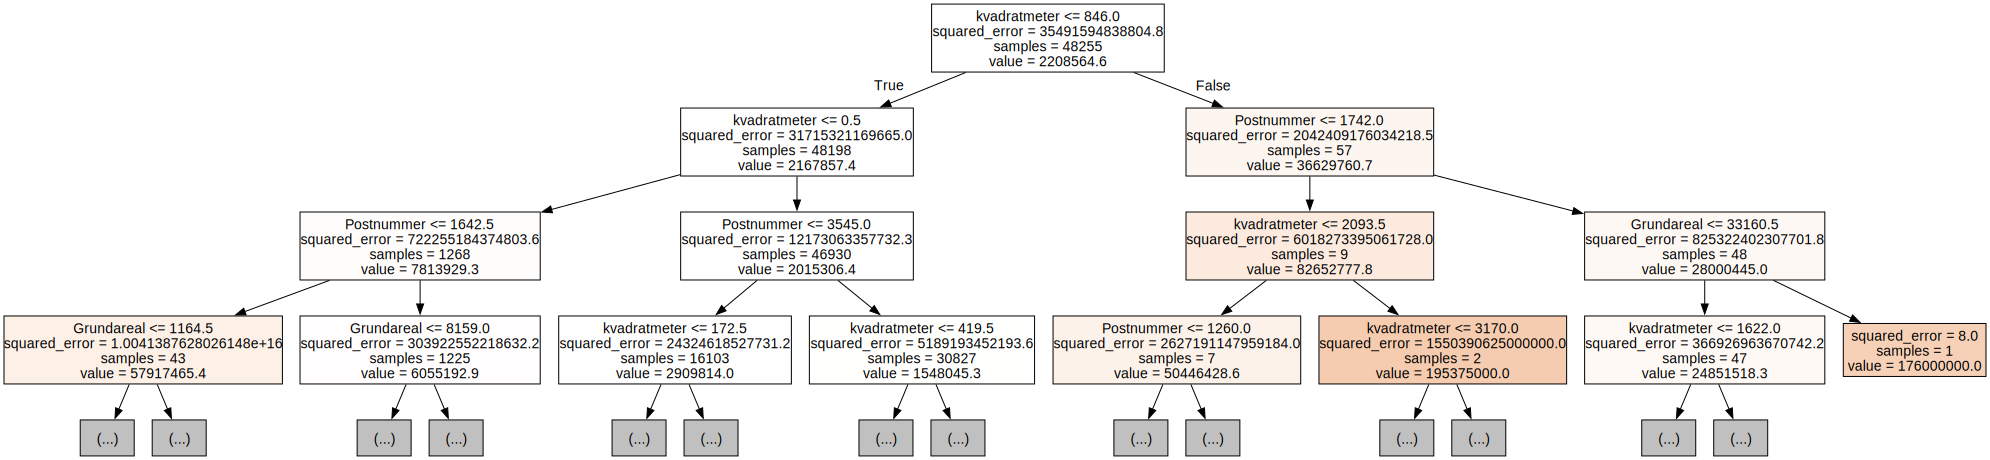

Max dybde: 44


In [40]:
# dataen vi har på husene undtagen salgsprisen
X = input_data

# salgspriserne som den skal gætte
y = truth_data

# Navn på parametre
labels = input_data.columns

# Her bliver modellen trænet på data
estimator = DecisionTreeRegressor(
   max_depth=50,                        # Hvor mange lag der højest må være - Hvor mange spørgsmål må der stilles ud af en gren
   random_state=42                      # Gør at vi får det samme "tilfældige" træ hver gang
   )
estimator.fit(X, y)

# laver visuel graf af træet
graph = Source(tree.export_graphviz(estimator, out_file=None,
   feature_names=labels,              # Labels bliver brugt som overskrifter
   filled=True,                       # Farver noder efter pris - højere pris, mørkere farve
   max_depth=3,                       # Hvor mange lag den skal vise i grafen
   precision=1,                       # Hvor mange decimaler vises
   rotate=False))
display(SVG(graph.pipe(format='svg')))

print("Max dybde:", estimator.get_depth()) 